In [1]:
# Uses python3
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import matplotlib
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)


In [54]:
def plot_TS_diag(data,case,plot_title=False):
    # Plot initial conditions and densities
    plt.figure(figsize=(8,8))
    plt.scatter(data['initial'].salt[0,:,:],data['initial'].temp[0,:,:],s=20.,c='k',label='Initial')
    plt.scatter(data['output'].Salt[-1,:,:],data['output'].Temp[-1,:,:],s=20.,c='r',label='Final')
    plt.xlim([34.5, 35.5])
    plt.ylim([7.5, 10.5])
    plt.xlabel('Salinity')
    plt.ylabel('Temperature')
    plt.legend()
    if plot_title:
        plt.title(case)
def plot_initial_final(data,case):
    # Plot initial conditions and densities
    plt.figure(figsize=(12,9))
    
    dens_levels = 11
    smin = 34 ; smax = 35.8
    tmin = 7.5 ; tmax = 10.5
    salt_opts = { 'levels':19, 'vmin':smin, 'vmax':smax, 'cmap':cmocean.cm.haline }
    temp_opts = { 'levels':19, 'vmin':tmin, 'vmax':tmax, 'cmap':cmocean.cm.thermal }
    
    plt.subplot(2,2,1)
    tidx = 0
    data['output'].Salt[tidx,:,:].plot.contourf(**salt_opts);
    data['output'].rhopot0[tidx,:,:].plot.contour(levels=dens_levels,colors='k');
    plt.gca().invert_yaxis()
    plt.subplot(2,2,2)
    data['output'].Temp[tidx,:,:].plot.contourf(**temp_opts);
    data['output'].rhopot0[tidx,:,:].plot.contour(levels=dens_levels,colors='k');
    plt.gca().invert_yaxis()
    tidx = -1
    plt.subplot(2,2,3)
    data['output'].Salt[tidx,:,:].plot.contourf(**salt_opts)
    data['output'].rhopot0[tidx,:,:].plot.contour(levels=dens_levels,colors='k');
    plt.gca().invert_yaxis()
    plt.subplot(2,2,4)
    data['output'].Temp[tidx,:,:].plot.contourf(**temp_opts)
    data['output'].rhopot0[tidx,:,:].plot.contour(levels=dens_levels,colors='k');
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    (data['output'].Salt[-1,:,:]-data['output'].Salt[0,:,:]).plot.contourf()
    plt.subplot(1,2,2)
    (data['output'].Temp[-1,:,:]-data['output'].Temp[0,:,:]).plot.contourf()
    plt.tight_layout()
def plot_density_evolution(data,case):
    plt.figure(figsize = (6,6))
    (data['output'].rhopot0[-1,:,:]-data['output'].rhopot0[0,:,:]).plot()
    plt.gca().invert_yaxis()
    plt.title('Density (Final-Initial)')
    
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    lonidx = 1
    (data['output'].rhopot0[:,:,lonidx]-data['output'].rhopot0[0,:,lonidx]).transpose().plot()
    plt.title(np.array(data['output']['Zonal Distance (m)'][lonidx]))
    plt.gca().invert_yaxis()

    plt.subplot(1,3,2)
    lonidx = 12
    (data['output'].rhoinsitu[:,:,lonidx]-data['output'].rhopot0[0,:,lonidx]).transpose().plot()
    plt.title(np.array(data['output']['Zonal Distance (m)'][lonidx]))
    plt.gca().invert_yaxis()
    plt.subplot(1,3,3)
    lonidx = 18
    (data['output'].rhopot0[:,:,lonidx]-data['output'].rhopot0[0,:,lonidx]).transpose().plot()
    plt.title(np.array(data['output']['Zonal Distance (m)'][lonidx]))
    plt.gca().invert_yaxis()
    plt.tight_layout()
def plot_dye_tracer(data,case):
    plt.figure()
    plt.subplot(1,2,1)
    data['output']['dye001'][0,:,:].plot(vmin=0,vmax=1.)
    plt.gca().invert_yaxis()
    plt.subplot(1,2,2)
    data['output']['dye001'][-1,:,:].plot(vmin=0,vmax=1.)
    plt.gca().invert_yaxis()
def calc_diff_APE(rho1, rho2):
    # APE defined as rho*g*z integrated from the bottom where z is distance above bottom
    # Bottom 
    z = 100-rho1.zl # 100 is here because the test case is 100m deep
    g = 10.
    return (rho2*g*z).sum('zl')-(rho2*g*z).sum('zl')
    

linear_TS


/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


<xarray.DataArray ()>
array(4.422234447366945e-16)
rho RMSE:  <xarray.DataArray 'rhoinsitu' ()>
array(9.094947017729282e-11)
linear_TS_int_drho


/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


<xarray.DataArray ()>
array(6.633351671050417e-16)
rho RMSE:  <xarray.DataArray 'rhoinsitu' ()>
array(1.5643308870494366e-10)
wright


/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/ashao/miniconda3/lib/python3.6/sit

<xarray.DataArray ()>
array(7.5128980309075386e-06)
rho RMSE:  <xarray.DataArray 'rhoinsitu' ()>
array(0.0073373316236029495)
wright_int_drho


/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/ashao/miniconda3/lib/python3.6/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or N

<xarray.DataArray ()>
array(9.049188539364569e-06)
rho RMSE:  <xarray.DataArray 'rhoinsitu' ()>
array(0.45345838654520776)
wright_linear
<xarray.DataArray ()>
array(7.551141604843063e-06)
rho RMSE:  <xarray.DataArray 'rhoinsitu' ()>
array(0.007377354254913371)


/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


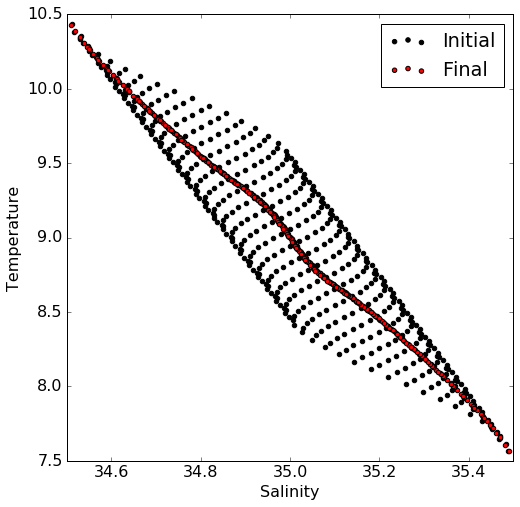

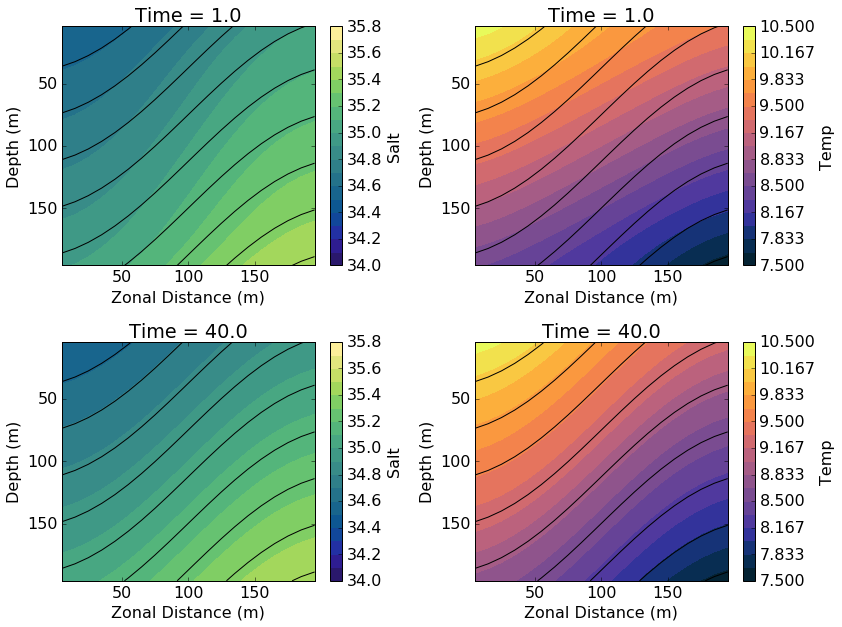

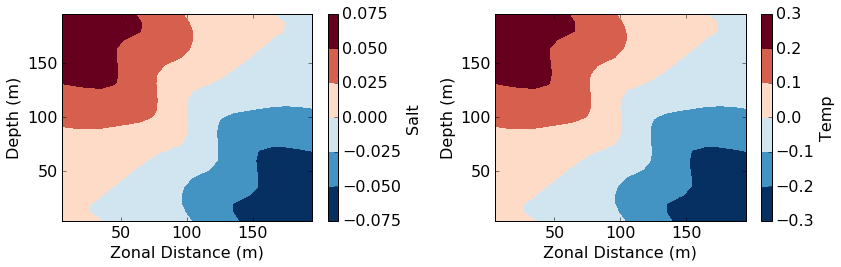

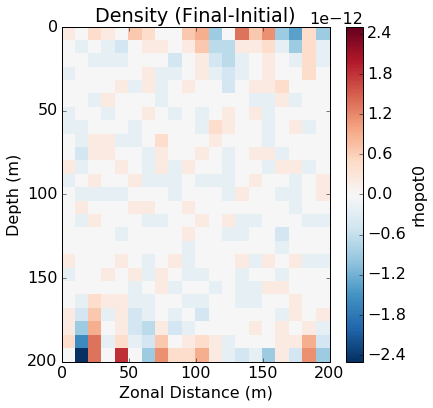

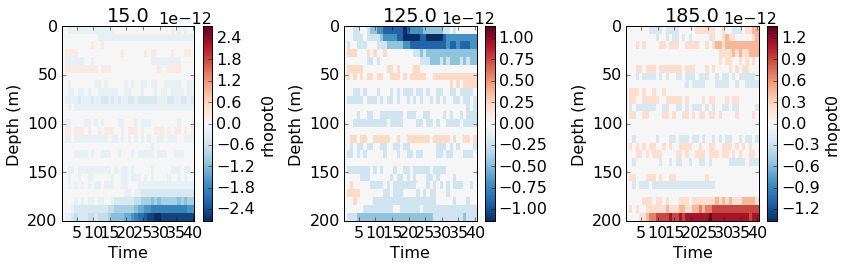

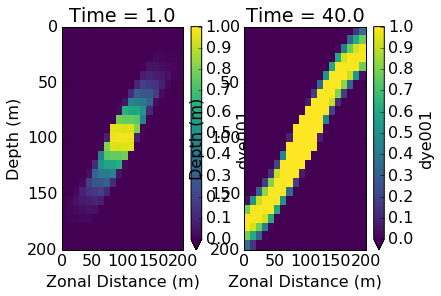

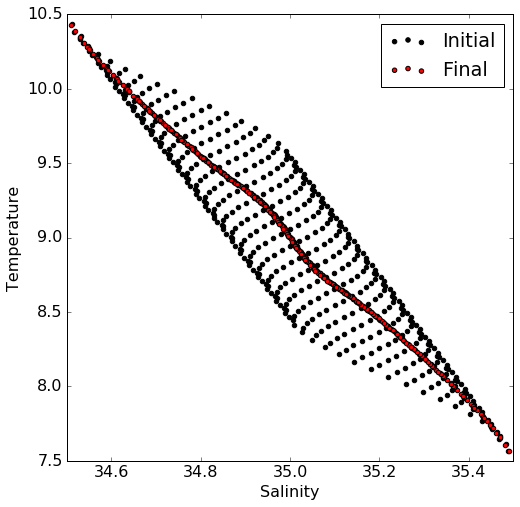

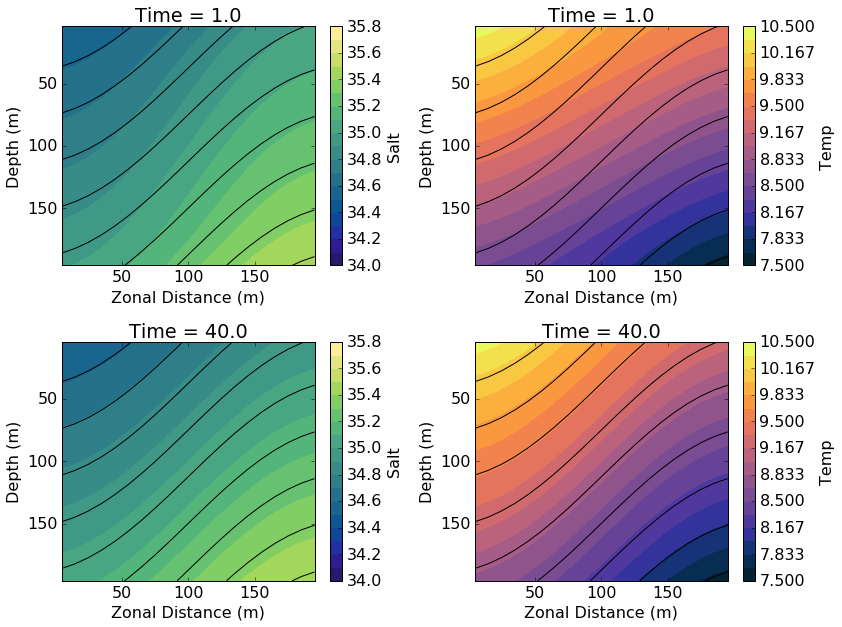

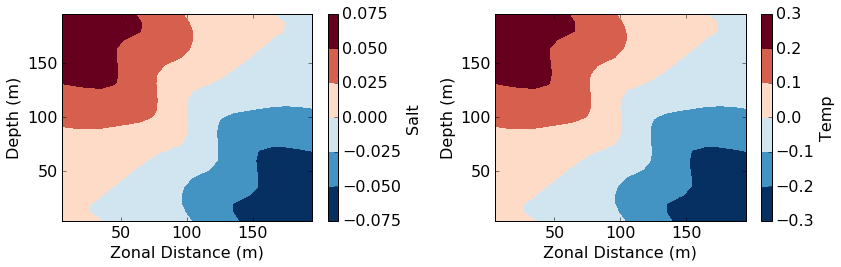

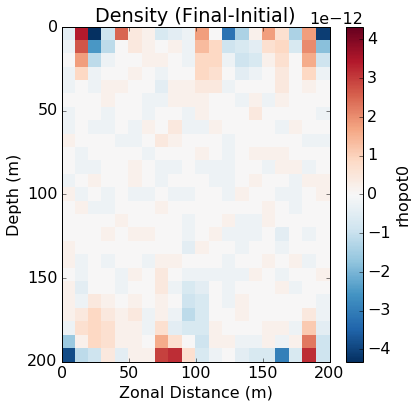

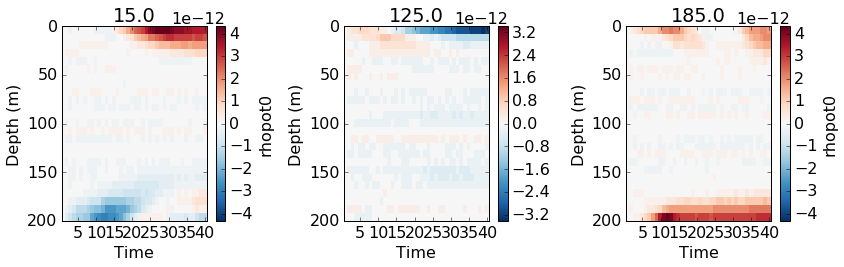

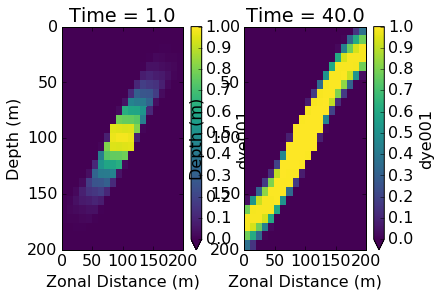

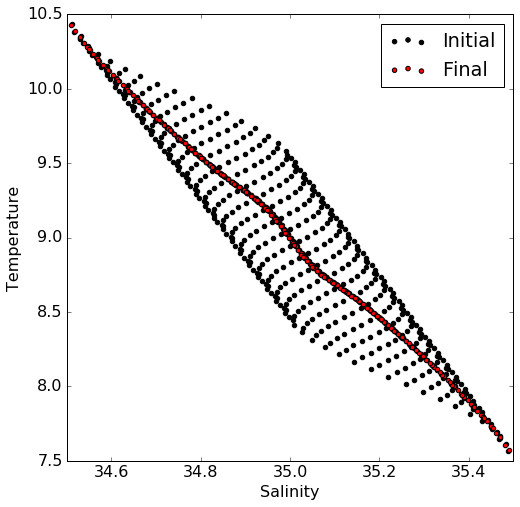

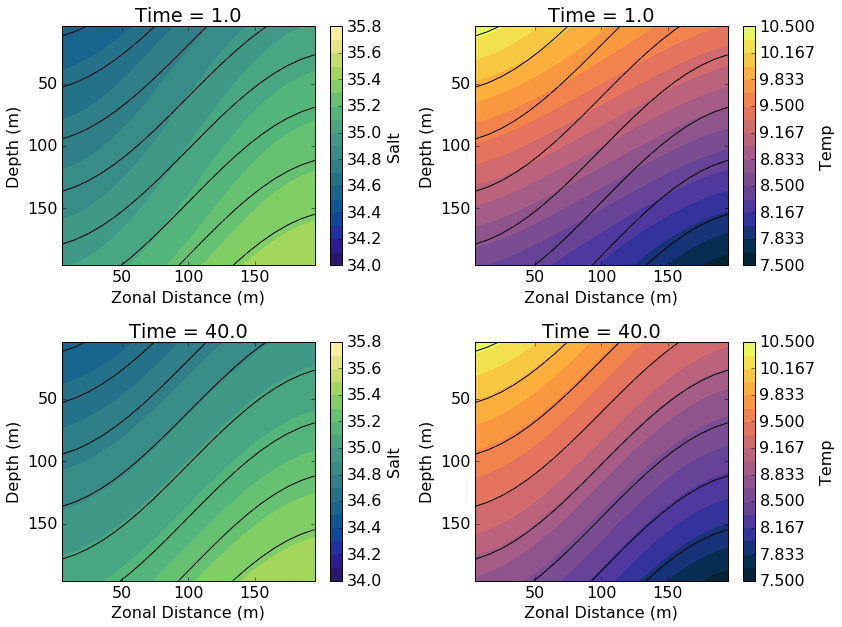

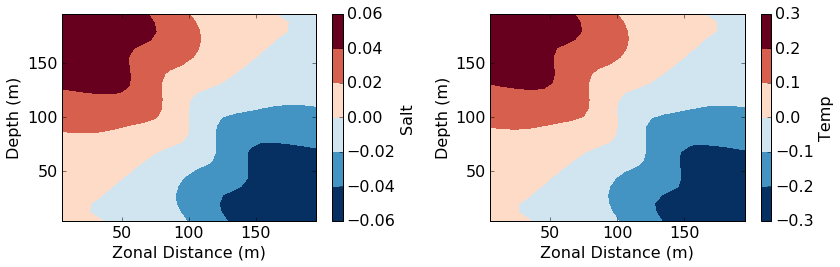

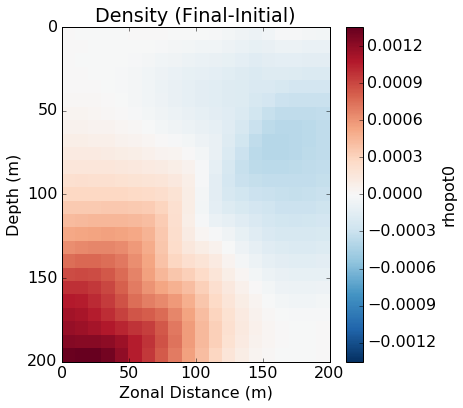

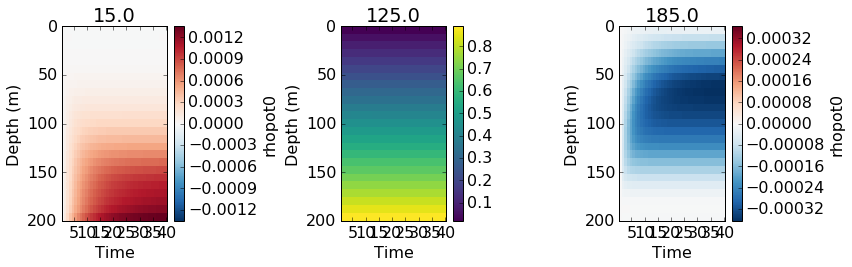

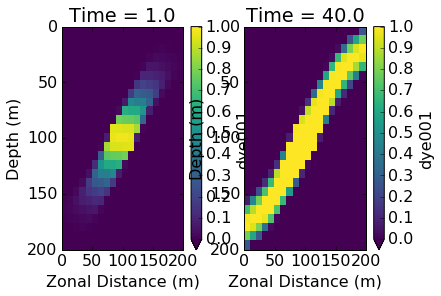

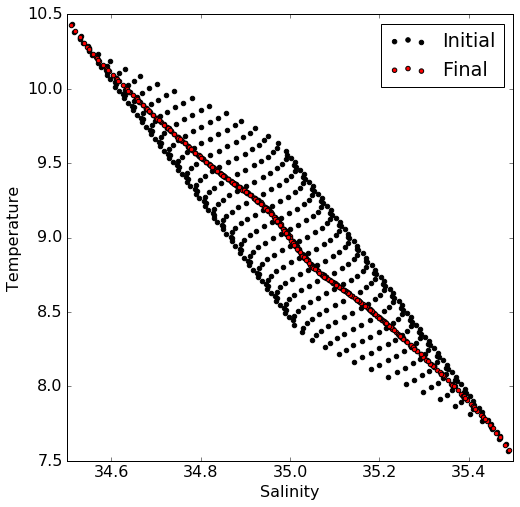

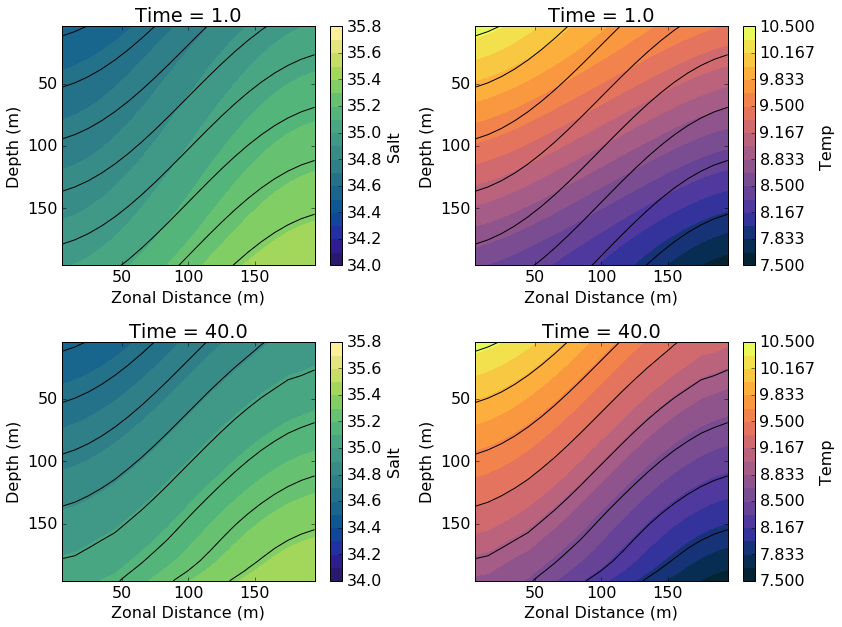

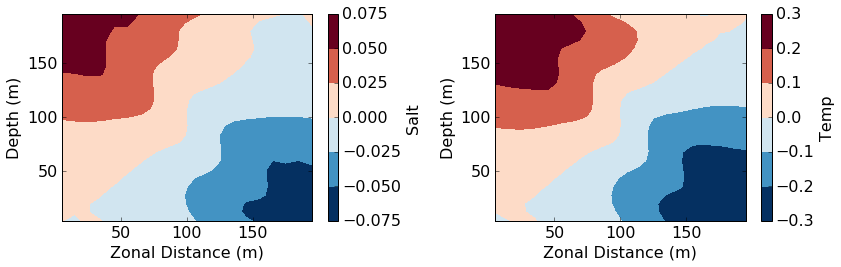

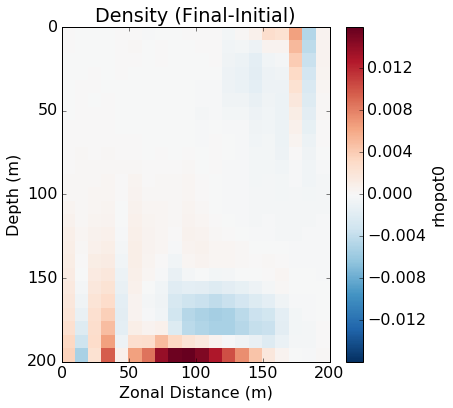

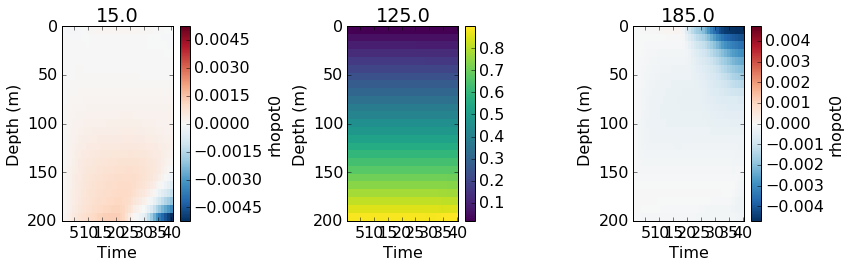

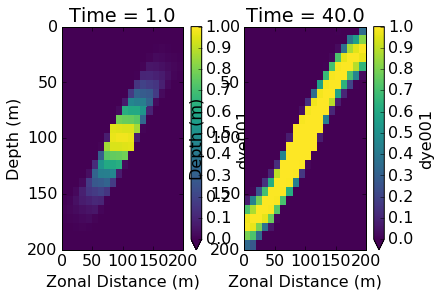

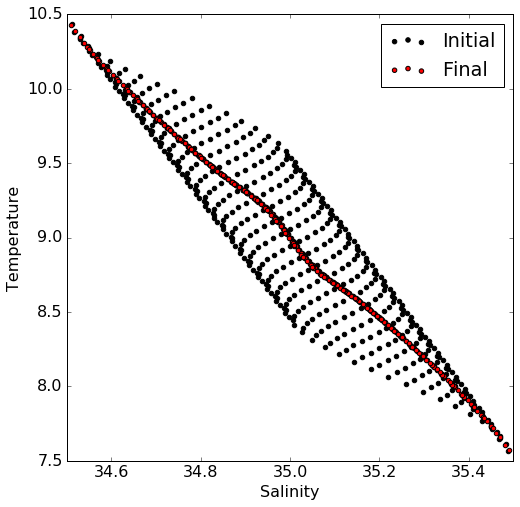

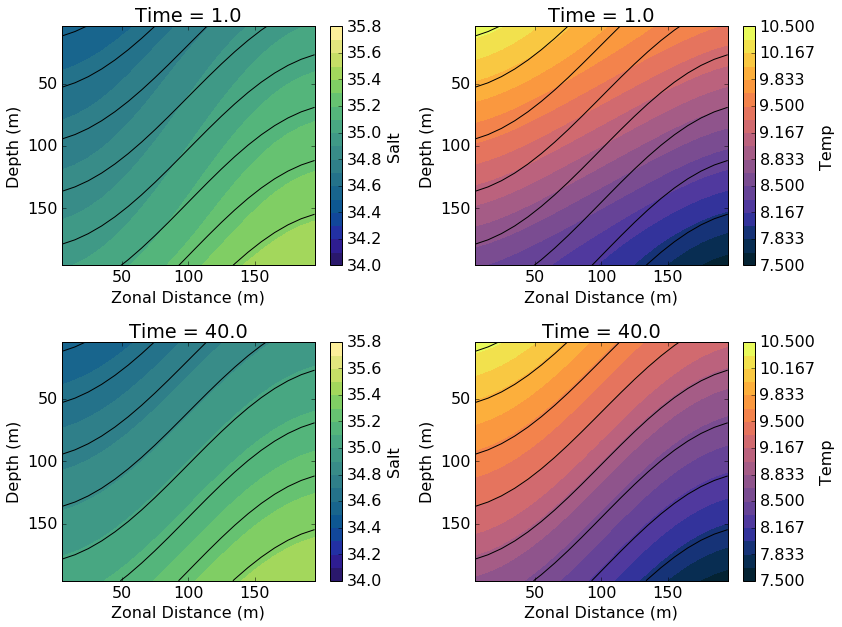

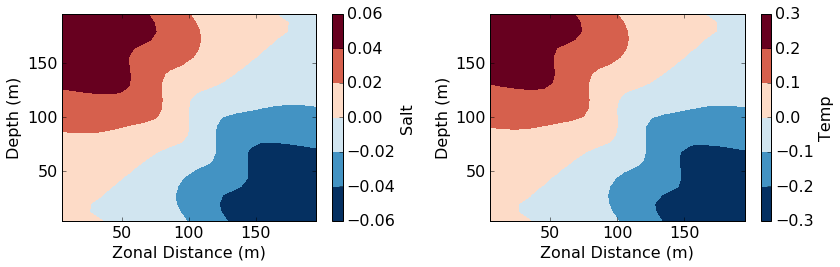

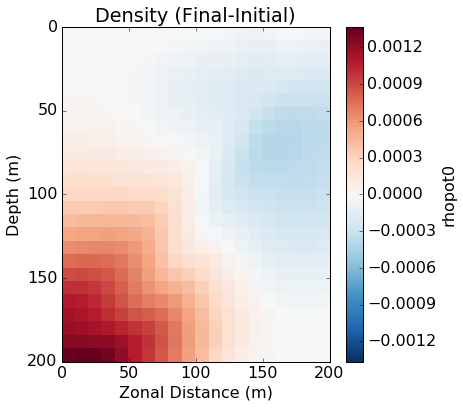

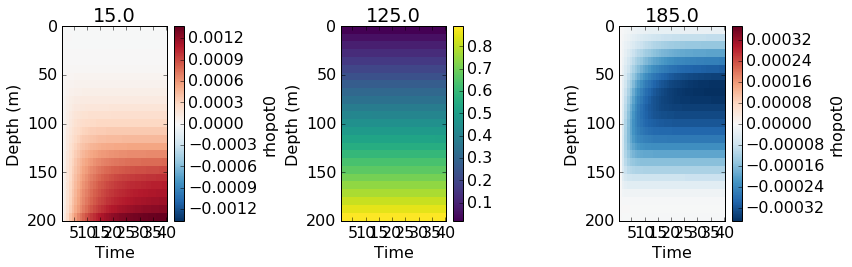

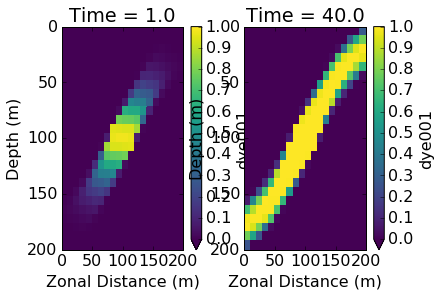

In [76]:
# Define and load all test cases
# cases = ['linear_S','linear_TS','wright','wright_full']
# cases = ['linear_S','linear_TS','wright']
cases = ['linear_TS','wright']
# cases = ['wright','wright_linear','wright_int_drho']
cases = ['linear_TS','linear_TS_int_drho','wright','wright_int_drho','wright_linear']
# cases = ['wright','wright_nk25','wright_nk50']
data = {}
diag_diff = {}
# Rename some variables to make them more descriptive for plotting
rename_initial = { 'Temp':'temp', 'Salt':'salt', 'Layer':'zl', 'lonh':'xh' }
rename_output  = {'xh':'Zonal Distance (m)', 'zl':'Depth (m)', 'temp':'Temp','salt':'Salt'}
for case in cases:
    data[case] = {}
    data[case]['initial'] = xr.open_dataset('{}/Initial_state.nc'.format(case), decode_times = False).mean(dim='lath')
    data[case]['output'] = xr.open_dataset('{}/prog.nc'.format(case), decode_times = False).mean(dim='yh')
    data[case]['initial'].rename(rename_initial,inplace=True)
    data[case]['output'].rename(rename_output,inplace=True)
for case in cases:
    g = 10.
    print(case)
    plot_TS_diag(data[case],case)
    plot_initial_final(data[case],case)
    plot_density_evolution(data[case],case)
    plot_dye_tracer(data[case],case)
    APE0 = (data[case]['output'].rhopot0[0,:,:]*g*data[case]['output']['Depth (m)'][::-1])
    APE0 = APE0.sum('Depth (m)')
    APE1 = (data[case]['output'].rhopot0[-1,:,:]*g*data[case]['output']['Depth (m)'][::-1])
    APE1 = APE1.sum('Depth (m)')
    plt.figure()
    diag_diff[case] = (0.2*(APE1-APE0)/( (APE1.Time-APE0.Time)*86400 ))
    print(0.2*(APE1-APE0).sum()/( (APE1.Time - APE0.Time)*86400))
    print('rho RMSE: ', np.sum(np.sqrt(np.square(data[case]['output'].rhoinsitu[0,:,:]-data[case]['output'].rhoinsitu[-1,:,:]))))
#     plt.ylabel('Diffusivity $m^2 s^{-1}$')

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


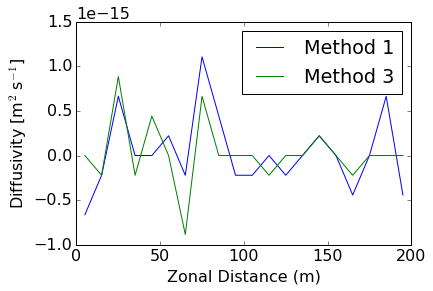

In [83]:
plt.figure()
diag_diff['linear_TS_int_drho'].plot(label='Method 1')
diag_diff['linear_TS'].plot(label='Method 3')
plt.ylabel('Diffusivity [m$^{2}$ s$^{-1}$]')
plt.legend()

/home/ashao/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


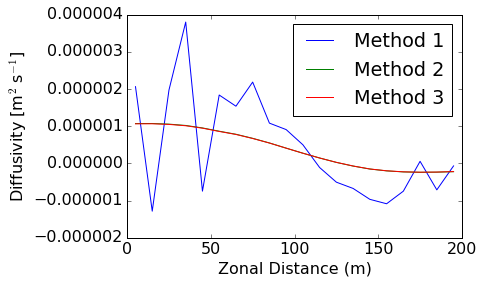

In [85]:
plt.figure()
diag_diff['wright_int_drho'].plot(label='Method 1')
diag_diff['wright_linear'].plot(label='Method 2')
diag_diff['wright'].plot(label='Method 3')
plt.ylabel('Diffusivity [m$^{2}$ s$^{-1}$]')
plt.legend()